<a href="https://colab.research.google.com/github/Pakhi27/MNIST--Handwritten-Digits--MLP-CNN-/blob/main/MNIST_Handwriitten_Digits_Dataset_MLP_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 417, in run
    _, build_failures = build(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 320, in build
    wheel_file = _build_one(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 194, in _build_one
    wheel_path = _build_one_inside_env(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/wheel_builder.py", line 241, in _build_one_inside_env

In [1]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.9.0':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

MNIST DATASET-MULTI LAYER PERCEPTION(MLP)-Classifying MNIST using Simple Model


In [ ]:
# According to LeCun's website, the MNIST is a: "database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# The features data are between 0 and 255, and we will normalize this to improve optimization performance.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# The current label scheme simply identifies the category to which each data point belongs (each handwritten digit is assigned a category equal to the number value).
print(y_train[0:5])

[5 0 4 1 9]


In [5]:
# Convert into one hot encoded vector
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [6]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [7]:
# The new Dataset API in TensorFlow 2.X allows you to define batch sizes as part of the dataset. It also has improved I/O characteristics, and is the recommended way of loading data. This allows you to iterate through subsets (batches) of the data during training. This is a common practice that improves performance by computing gradients over smaller batches. We will see this in action during the training step.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [ ]:
# Converting a 2-D image into a 1-D Vector

In [8]:

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [9]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [10]:
#Adding Weights and Biases to input
def forward(x):
    return tf.matmul(x,W) + b

In [ ]:
# Softmax Regression

In [11]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


Now we can define our output layer

In [12]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [ ]:
# Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution.

In [ ]:
# Let's create a model function for convenience.

In [ ]:
# Cost function

In [14]:
def model(x):
    x = flatten(x)
    return activate(x)

In [15]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.12

In [ ]:
# Type of optimization: Gradient Descent

In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [17]:
# Now we define the training step. This step uses GradientTape to automatically compute deriviatives of the functions we have manually created and applies them using the SGD optimizer.
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )
    return current_loss.numpy()

In [ ]:
# Training batches

In [18]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) )

    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )


epoch  0 batch 500 loss: 308.78094
epoch  0 batch 1000 loss: 243.85347
end of epoch  0 loss 335063.8 accuracy 0.73728335
epoch  1 batch 500 loss: 270.43488
epoch  1 batch 1000 loss: 239.25098
end of epoch  1 loss 331978.1 accuracy 0.74156666
epoch  2 batch 500 loss: 290.95187
epoch  2 batch 1000 loss: 253.18973
end of epoch  2 loss 325348.25 accuracy 0.7507667
epoch  3 batch 500 loss: 292.71637
epoch  3 batch 1000 loss: 260.54138
end of epoch  3 loss 321318.7 accuracy 0.75453335
epoch  4 batch 500 loss: 289.2487
epoch  4 batch 1000 loss: 242.80728
end of epoch  4 loss 326882.06 accuracy 0.7500833
epoch  5 batch 500 loss: 280.16818
epoch  5 batch 1000 loss: 230.50214
end of epoch  5 loss 321615.75 accuracy 0.75516665
epoch  6 batch 500 loss: 277.45898
epoch  6 batch 1000 loss: 230.25873
end of epoch  6 loss 318383.2 accuracy 0.7596667
epoch  7 batch 500 loss: 296.34238
epoch  7 batch 1000 loss: 230.25853
end of epoch  7 loss 317834.22 accuracy 0.7604667
epoch  8 batch 500 loss: 294.9890

In [ ]:
# Test and Plots

In [19]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.7582833
test accuracy 0.7536


In [ ]:
# The next two plots show the performance of the optimization at each epoch.

Text(0, 0.5, 'loss')

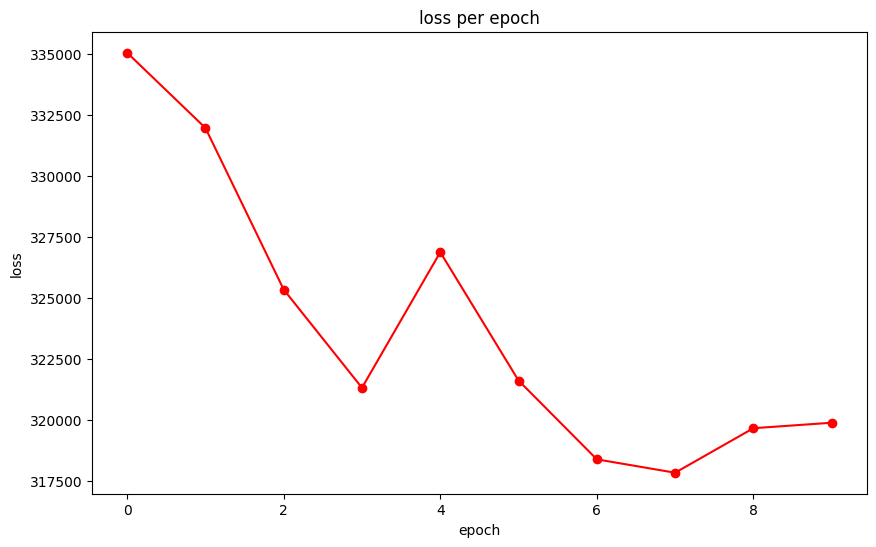

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

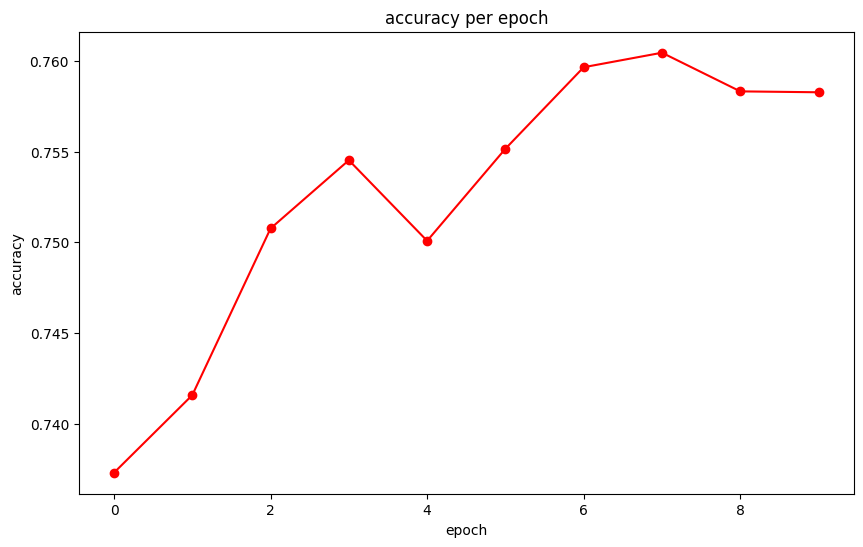

In [21]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

MNIST Handwritten digits Dataset-CNN Model

In [22]:
width = 28 # width of the image in pixels
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image
class_output = 10 # number of possible classifications for the problem

In [ ]:
# Converting images of the data set to tensors

In [23]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])
x_image_train = tf.cast(x_image_train, 'float32')

x_image_test = tf.reshape(x_test, [-1,28,28,1])
x_image_test = tf.cast(x_image_test, 'float32')

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [24]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

In [ ]:
# Defining kernel weight and bias

In [ ]:
# We define a kernel here. The Size of the filter/kernel is 5x5; Input channels is 1 (grayscale); and we need 32 different feature maps (here, 32 feature maps means 32 different filters are applied on each image. So, the output of convolution layer would be 28x28x32). In this step, we create a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]

In [25]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [ ]:
# Change the filter to a 2-D matrix with shape [5*5*1,32]
# Extracts image patches from the input tensor to form a virtual tensor of shape [batch, 28, 28, 5*5*1].
# For each batch, right-multiplies the filter matrix and the image vector.

In [ ]:
# Output:

# A Tensor (a 2-D convolution) of size tf.Tensor 'add_7:0' shape=(?, 28, 28, 32)- Notice: the output of the first convolution layer is 32 [28x28] images.

In [26]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [ ]:
# In this step, we just go through all outputs convolution layer, convolve1, and wherever a negative number occurs, we swap it out for a 0. It is called ReLU activation Function.

In [27]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [29]:
# Apply the max pooling

In [ ]:
# max pooling is a form of non-linear down-sampling. It partitions the input image into a set of rectangles and, and then find the maximum value for that region.

# Lets use tf.nn.max_pool function to perform max pooling. Kernel size: 2x2 (if the window is a 2x2 matrix, it would result in one output pixel)
# Strides: dictates the sliding behaviour of the kernel. In this case it will move 2 pixels everytime, thus not overlapping. The input is a matrix of size 28x28x32, and the output would be a matrix of size 14x14x32.

In [30]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
# Convolutional Layer 2
# Weights and Biases of kernels

In [ ]:
# Filter/kernel: 5x5 (25 pixels)
# Input channels: 32 (from the 1st Conv layer, we had 32 feature maps)
# 64 output feature maps

In [31]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [ ]:
# Convolve image with weight tensor and add biases.

In [32]:
def convolve2(x):
    return(
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [33]:
# Apply the ReLU activation Function
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [ ]:
# Apply the max pooling

In [34]:
def conv2(x):
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))
    # it is 64 matrix of [7x7]

In [ ]:
# Fully Connected Layer

In [ ]:
# Flattening Second Layer

In [35]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [ ]:
# Weights and Biases between layer 2 and 3¶

In [36]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [ ]:
# Matrix Multiplication (applying weights and biases)

In [37]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [ ]:
# Apply the ReLU activation Function

In [38]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [ ]:
# Processing-Drop out layer,to reduce overfitting

In [39]:

keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

In [ ]:
# Readout Layer (Softmax Layer)

In [ ]:
# In last layer, CNN takes the high-level filtered images and translate them into votes using softmax. Input channels: 1024 (neurons from the 3rd Layer); 10 output features

In [40]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [ ]:
# Matrix Multiplication (applying weights and biases)

In [41]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [ ]:
# Apply the Softmax activation Function

In [42]:
def y_CNN(x): return tf.nn.softmax(fc(x))

In [43]:
# define cross entropy
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [ ]:
Define the optimizer
# It is obvious that we want minimize the error of our network which is calculated by cross_entropy metric. To solve the problem, we have to compute gradients for the loss (which is minimizing the cross-entropy) and apply gradients to variables. It will be done by an optimizer: GradientDescent or Adagrad.

In [44]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [45]:
# Following the convention of our first example, we will use GradientTape to define a model.
variables = [W_conv1, b_conv1, W_conv2, b_conv2,
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [ ]:
# Define prediction
# to know how many of the cases in a mini-batch has been classified correctly.lets count them.

In [46]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [49]:
# Define accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.82>

In [ ]:
# Run session, train

In [50]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy))

    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 50 loss: 9.128885 accuracy 0.92
epoch  0 batch 100 loss: 12.477585 accuracy 0.94
epoch  0 batch 150 loss: 7.174155 accuracy 0.94
epoch  0 batch 200 loss: 6.2980733 accuracy 0.98
epoch  0 batch 250 loss: 12.601461 accuracy 0.9
epoch  0 batch 300 loss: 11.595507 accuracy 0.88
epoch  0 batch 350 loss: 13.643561 accuracy 0.94
epoch  0 batch 400 loss: 11.735493 accuracy 0.98
epoch  0 batch 450 loss: 11.962231 accuracy 0.94
epoch  0 batch 500 loss: 8.004503 accuracy 0.94
epoch  0 batch 550 loss: 11.193573 accuracy 0.94
epoch  0 batch 600 loss: 8.275618 accuracy 0.94
epoch  0 batch 650 loss: 10.815585 accuracy 0.94
epoch  0 batch 700 loss: 7.2381287 accuracy 0.94
epoch  0 batch 750 loss: 16.618761 accuracy 0.92
epoch  0 batch 800 loss: 11.084463 accuracy 0.9
epoch  0 batch 850 loss: 9.713497 accuracy 0.92
epoch  0 batch 900 loss: 6.6929317 accuracy 0.92
epoch  0 batch 950 loss: 14.534276 accuracy 0.92
epoch  0 batch 1000 loss: 8.008217 accuracy 0.92
epoch  0 batch 1050 loss: 4.